In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [34]:
# Creating data frames for both csv files
genotypes_df = pd.read_csv(
    'data/genotypes.csv'
)
phenotypes_df = pd.read_csv(
    'data/phenotype_df.csv',
    usecols=[4]
)

In [35]:
genotypes_df

,sample_id,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_491,var_492,var_493,var_494,var_495,var_496,var_497,var_498,var_499,var_500
0,sample_0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,sample_1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,sample_2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,sample_3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,sample_4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sample_1995,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1996,sample_1996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,sample_1997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,sample_1998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
phenotypes_df

,LDL
0,0.628567
1,1.201150
2,0.497542
3,-1.705572
4,0.387260
...,...
1995,0.856525
1996,-0.534039
1997,0.430098
1998,-1.935098


In [89]:
# Excluding 'sample_id'
genotypes_vals = genotypes_df.iloc[:, 1:].values    

# Assuming equal weights
weights = np.ones(genotypes_df.shape[1]-1)

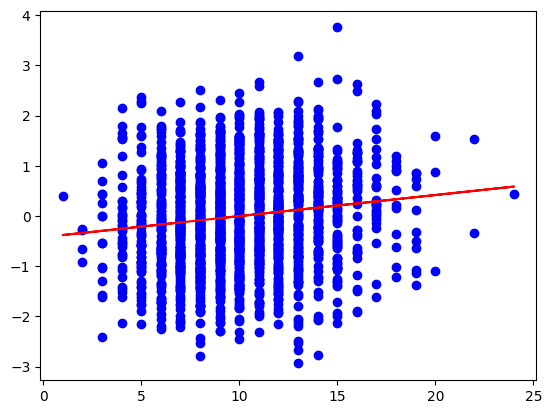

In [170]:
# Dot product for weighted sum
gene_burdens = np.dot(genotypes_vals, weights).reshape(-1, 1)

# Adding B_0 term for predictor
X = np.concatenate([np.ones((gene_burdens.shape[0], 1)), gene_burdens], axis=1)

# Target values
y = phenotypes_df.values

theta = np.linalg.inv(X.T@X) @ (X.T@y)

# Predicted values of y
yhat = X @ theta

plt.plot(X[:, 1],y,"bo", X[:, 1], yhat, "r")

Note that the regression function does not entirely explain the variability in LDL levels (explained below).

In [167]:
# t-test

err = y - yhat

# Standard error
sse = np.sum(err**2)
mse = sse / (X.shape[0] - X.shape[1])
se = np.sqrt(mse * np.diag(np.linalg.inv(X.T @ X))).reshape(-1, 1)

# t-stat
t_stats = theta / se

# p-values
p_values = [2 * (1 - stats.t.cdf(np.abs(t), df=X.shape[0] - X.shape[1])) for t in t_stats]

In [171]:
print("coefficients:", theta)
print("standard errors:", se)
print("t-statistics:", t_stats)
print("p-values:", p_values)

coefficients: [[-0.42207311]
 [ 0.04199106]]
standard errors: [[0.07333646]
 [0.00695485]]
t-statistics: [[-5.75529701]
 [ 6.03766139]]
p-values: [array([9.98759186e-09]), array([1.85935489e-09])]


The p-values for both the intercept ($\beta_0$) and the gene burden coefficient ($\beta_1$) are extremely small, the former indicating that it is highly unlikely for the intercept to be 0 and the latter suggesting a strong relationship between gene burden and LDL levels. 

In [172]:
# Calculate R^2
ss_total = np.sum((y - np.mean(y))**2)
ss_err = np.sum(err**2)
r_squared = 1 - (ss_err / ss_total)

print("R^2:", r_squared)

R^2: 0.017918009761115017


However, a low $R^2$ value indicates that only a small percentage of the variance ($\approx 1.79%$) is explained by the gene burden in this model. This may suggest that while the gene burden is statistically significant, it does not explain much of the variability in LDL levels. This leads us to believe that other factors not included in this model may play a more important role on determining LDL levels.